# Continuous Optimisation

Since machine learning algorithms are implemented on a computer, the
mathematical formulations are expressed as numerical optimization methods.
This chapter describes the basic numerical methods for training machine
learning models. Training a machine learning model often boils
down to finding a good set of parameters. The notion of "good" is determined
by the objective function or the probabilistic model. Given an objective
function, finding the best value is done using optimization algorithms.

This notebook covers two main branches of continuous optimization unconstrained and constrained optimization.
We will assume in
this chapter that our objective function is differentiable, hence we have access to a gradient at each location in the space to help us
find the optimum value. By convention, most objective functions in machine
learning are intended to be minimized, that is, the best value is the
minimum value. Intuitively finding the best value is like finding the valleys
of the objective function, and the gradients point us uphill. The idea is
to move downhill (opposite to the gradient) and hope to find the deepest
point. For unconstrained optimization, this is the only concept we need,
but there are several design choices. For
constrained optimization, we need to introduce other concepts to manage
the constraints. We will also introduce a special class
of problems (convex optimization problems) where we can
make statements about reaching the global optimum.

Consider the function below. The function has a global minimum around $x = -4.5$, with a function value of approximately $-47$. Since
the function is "smooth," the gradients can be used to help find the minimum
by indicating whether we should take a step to the right or left.

This assumes that we are in the correct bowl, as there exists another local local minimum
minimum around $x = 0.7$. Recall that we can solve for all the stationary
points of a function by calculating its derivative and setting it to zero.

**Stationary points are the real roots of the derivative, that is, points that have zero gradient.**

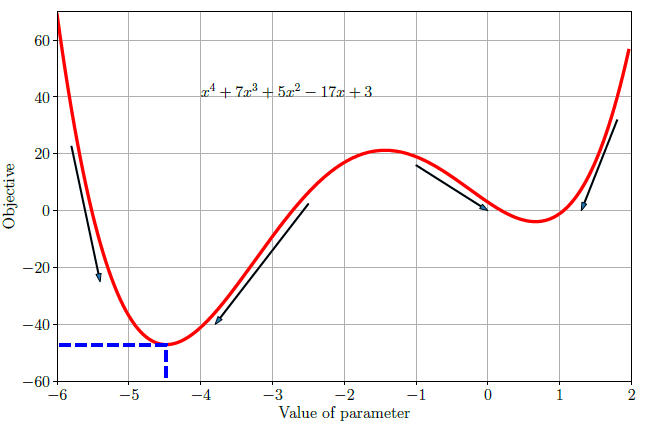

_Example objective function. Negative gradients are indicated by arrows, and the global minimum is indicated by the dashed blue line._

For the equation in the figure above:

\begin{equation}
\ell(x) = x^4 + 7x^3 + 5x^2 - 17x + 3
\end{equation}

we obtain the corresponding gradient as

\begin{equation}
\frac{d\ell(x)}{dx} = 4x^3 + 21x^2 - 10x - 17
\end{equation}

Since this is a cubic equation, it has in general three solutions when set to
zero. In the example, two of them are minimums and one is a maximum
(around $x = -1.4$). To check whether a stationary point is a minimum
or maximum, we need to take the derivative a second time and check
whether the second derivative is positive or negative at the stationary
point. In our case, the second derivative is

\begin{equation}
\frac{d^2\ell(x)}{dx^2} = 12x^2 + 42x + 10
\end{equation}

Note that we have avoided analytically solving for values of x in the
previous discussion, although for low-order polynomials such as the preceding
we could do so. In general, we are unable to find analytic solutions,
and hence we need to start at some value, say $x_0 = -6$, and follow
the negative gradient. The negative gradient indicates that we should go
right, but not how far (this is called the step-size). Furthermore, if we
had started at the right side (e.g., $x_0 = 0$) the negative gradient would
have led us to the wrong minimum. The figure above illustrates the fact that for
$x > -1$, the negative gradient points toward the minimum on the right of
the figure, which has a larger objective value.

Convex functions, that do not exhibit this tricky dependency on the starting point
of the optimization algorithm. For convex functions, all local minimums
are global minimum. It turns out that many machine learning objective
functions are designed such that they are convex.

## Optimisation Using Gradient Descent

In [ ]:
\mathbb{R}

\mathbb{E}